# Exploratory Data Analysis - Energy Datasets

**Project:** AI Final Year Project  
**Date:** December 2025  
**Objective:** Initial exploration of energy datasets to understand their characteristics and suitability for showcasing ML algorithms

## Datasets to Analyze:
1. `ENB2012_data.xlsx` - Energy Efficiency Dataset
2. `energydata_complete.csv` - Appliance Energy Prediction Dataset

## Goals:
- Understand dataset sizes and structure
- Check data quality (missing values, types)
- Identify suitable algorithms for each dataset
- Determine which datasets should be in Git vs downloaded separately

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


## 2. Check Dataset Sizes

First, let's check the file sizes to understand which datasets are large and should be handled separately from Git.

In [2]:
# Define dataset paths
dataset_dir = Path('../datasets')
datasets = [
    'ENB2012_data.xlsx',
    'energydata_complete.csv'
]

# Check file sizes
print("=" * 70)
print("DATASET SIZE ANALYSIS")
print("=" * 70)

dataset_info = []
for dataset in datasets:
    filepath = dataset_dir / dataset
    if filepath.exists():
        size_bytes = filepath.stat().st_size
        size_mb = size_bytes / (1024 * 1024)
        git_track = "YES (< 10MB)" if size_mb < 10 else "NO (> 10MB) - Download separately"
        
        dataset_info.append({
            'Dataset': dataset,
            'Size (MB)': round(size_mb, 2),
            'Track in Git': git_track
        })
        
        print(f"\n📊 {dataset}")
        print(f"   Size: {size_mb:.2f} MB")
        print(f"   Git Tracking: {git_track}")
    else:
        print(f"\n❌ {dataset} - FILE NOT FOUND")
        dataset_info.append({
            'Dataset': dataset,
            'Size (MB)': 'N/A',
            'Track in Git': 'File not found'
        })

print("\n" + "=" * 70)

# Create summary DataFrame
df_sizes = pd.DataFrame(dataset_info)
print("\n📋 SUMMARY TABLE:")
print(df_sizes.to_string(index=False))

DATASET SIZE ANALYSIS

📊 ENB2012_data.xlsx
   Size: 0.07 MB
   Git Tracking: YES (< 10MB)

📊 energydata_complete.csv
   Size: 11.42 MB
   Git Tracking: NO (> 10MB) - Download separately


📋 SUMMARY TABLE:
                Dataset  Size (MB)                      Track in Git
      ENB2012_data.xlsx       0.07                      YES (< 10MB)
energydata_complete.csv      11.42 NO (> 10MB) - Download separately


## 3. Load and Inspect Dataset 1: ENB2012_data.xlsx

Energy Efficiency Dataset - Building characteristics and energy consumption

In [3]:
# Load Dataset 1
try:
    df1 = pd.read_excel(dataset_dir / 'ENB2012_data.xlsx')
    
    print("=" * 70)
    print("DATASET 1: ENB2012_data.xlsx - Energy Efficiency")
    print("=" * 70)
    
    print(f"\n📐 Shape: {df1.shape[0]} rows × {df1.shape[1]} columns")
    print(f"\n📋 Columns:")
    for i, col in enumerate(df1.columns, 1):
        print(f"   {i}. {col}")
    
    print(f"\n🔍 First 5 rows:")
    display(df1.head())
    
    print(f"\n📊 Data Types:")
    display(df1.dtypes)
    
    print(f"\n💾 Memory Usage:")
    print(df1.memory_usage(deep=True).sum() / 1024, "KB")
    
except FileNotFoundError:
    print("❌ ENB2012_data.xlsx not found in datasets folder")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

DATASET 1: ENB2012_data.xlsx - Energy Efficiency

📐 Shape: 768 rows × 10 columns

📋 Columns:
   1. X1
   2. X2
   3. X3
   4. X4
   5. X5
   6. X6
   7. X7
   8. X8
   9. Y1
   10. Y2

🔍 First 5 rows:


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28



📊 Data Types:


X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object


💾 Memory Usage:
60.12890625 KB


In [4]:
# Dataset 1: Basic Statistics
if 'df1' in locals():
    print("=" * 70)
    print("DATASET 1: BASIC STATISTICS")
    print("=" * 70)
    display(df1.describe())
    
    print("\n✅ Missing Values:")
    missing = df1.isnull().sum()
    if missing.sum() == 0:
        print("   No missing values found!")
    else:
        display(missing[missing > 0])

DATASET 1: BASIC STATISTICS


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000



✅ Missing Values:
   No missing values found!


## 4. Load and Inspect Dataset 2: energydata_complete.csv

Appliance Energy Prediction Dataset - Time-series energy consumption data

In [5]:
# Load Dataset 2
try:
    df2 = pd.read_csv(dataset_dir / 'energydata_complete.csv')
    
    print("=" * 70)
    print("DATASET 2: energydata_complete.csv - Appliance Energy Prediction")
    print("=" * 70)
    
    print(f"\n📐 Shape: {df2.shape[0]} rows × {df2.shape[1]} columns")
    print(f"\n📋 Columns:")
    for i, col in enumerate(df2.columns, 1):
        print(f"   {i}. {col}")
    
    print(f"\n🔍 First 5 rows:")
    display(df2.head())
    
    print(f"\n🔍 Last 5 rows:")
    display(df2.tail())
    
    print(f"\n📊 Data Types:")
    display(df2.dtypes)
    
    print(f"\n💾 Memory Usage:")
    print(f"{df2.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
    
except FileNotFoundError:
    print("❌ energydata_complete.csv not found in datasets folder")
    print("   This file should be downloaded separately (see DATA_SOURCES.md)")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

DATASET 2: energydata_complete.csv - Appliance Energy Prediction

📐 Shape: 19735 rows × 29 columns

📋 Columns:
   1. date
   2. Appliances
   3. lights
   4. T1
   5. RH_1
   6. T2
   7. RH_2
   8. T3
   9. RH_3
   10. T4
   11. RH_4
   12. T5
   13. RH_5
   14. T6
   15. RH_6
   16. T7
   17. RH_7
   18. T8
   19. RH_8
   20. T9
   21. RH_9
   22. T_out
   23. Press_mm_hg
   24. RH_out
   25. Windspeed
   26. Visibility
   27. Tdewpoint
   28. rv1
   29. rv2

🔍 First 5 rows:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097



🔍 Last 5 rows:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851



📊 Data Types:


date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


💾 Memory Usage:
5.50 MB


In [6]:
# Dataset 2: Basic Statistics
if 'df2' in locals():
    print("=" * 70)
    print("DATASET 2: BASIC STATISTICS")
    print("=" * 70)
    display(df2.describe())
    
    print("\n✅ Missing Values:")
    missing = df2.isnull().sum()
    if missing.sum() == 0:
        print("   No missing values found!")
    else:
        print(f"   Total missing values: {missing.sum()}")
        display(missing[missing > 0])

DATASET 2: BASIC STATISTICS


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530



✅ Missing Values:
   No missing values found!


## 5. Compare Dataset Characteristics

DATASET COMPARISON


,Dataset,Rows,Columns,Numeric Cols,Categorical Cols,Missing Values,Memory (MB)
0,ENB2012_data.xlsx,768,10,10,0,0,0.06
1,energydata_complete.csv,19735,29,28,1,0,5.50


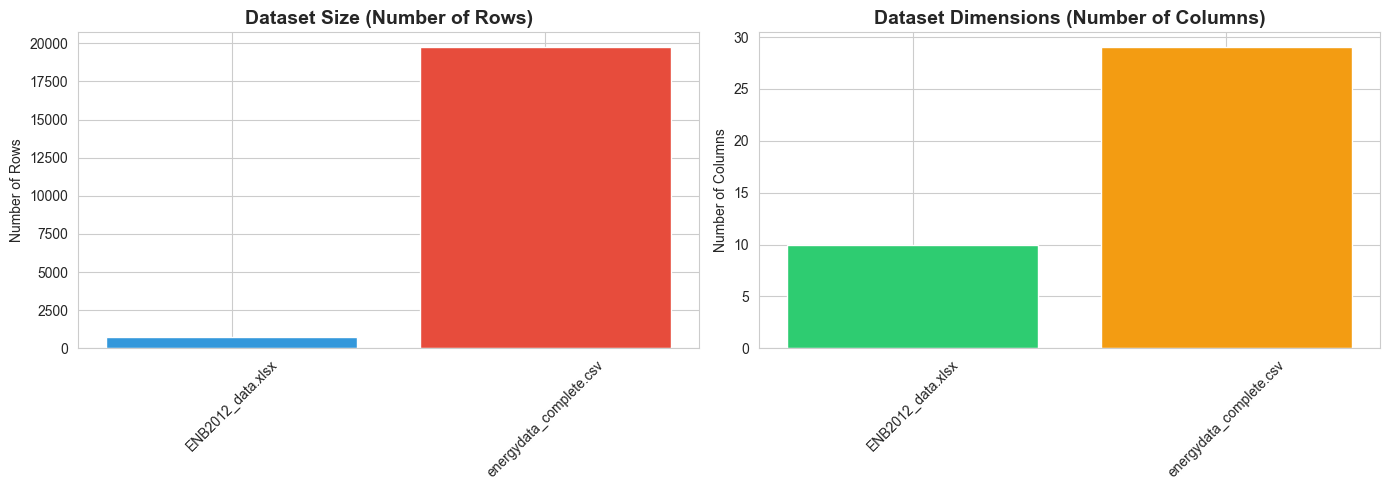

In [7]:
# Compare datasets
comparison_data = []

if 'df1' in locals():
    comparison_data.append({
        'Dataset': 'ENB2012_data.xlsx',
        'Rows': df1.shape[0],
        'Columns': df1.shape[1],
        'Numeric Cols': len(df1.select_dtypes(include=[np.number]).columns),
        'Categorical Cols': len(df1.select_dtypes(exclude=[np.number]).columns),
        'Missing Values': df1.isnull().sum().sum(),
        'Memory (MB)': round(df1.memory_usage(deep=True).sum() / (1024*1024), 2)
    })

if 'df2' in locals():
    comparison_data.append({
        'Dataset': 'energydata_complete.csv',
        'Rows': df2.shape[0],
        'Columns': df2.shape[1],
        'Numeric Cols': len(df2.select_dtypes(include=[np.number]).columns),
        'Categorical Cols': len(df2.select_dtypes(exclude=[np.number]).columns),
        'Missing Values': df2.isnull().sum().sum(),
        'Memory (MB)': round(df2.memory_usage(deep=True).sum() / (1024*1024), 2)
    })

if comparison_data:
    df_comparison = pd.DataFrame(comparison_data)
    print("=" * 90)
    print("DATASET COMPARISON")
    print("=" * 90)
    display(df_comparison)
    
    # Visualize comparison
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Number of rows
    axes[0].bar(df_comparison['Dataset'], df_comparison['Rows'], color=['#3498db', '#e74c3c'])
    axes[0].set_title('Dataset Size (Number of Rows)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Number of Rows')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Number of columns
    axes[1].bar(df_comparison['Dataset'], df_comparison['Columns'], color=['#2ecc71', '#f39c12'])
    axes[1].set_title('Dataset Dimensions (Number of Columns)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Number of Columns')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 6. Correlation Analysis - Dataset 1

Understanding relationships between features helps us choose appropriate ML algorithms

CORRELATION ANALYSIS - Dataset 1


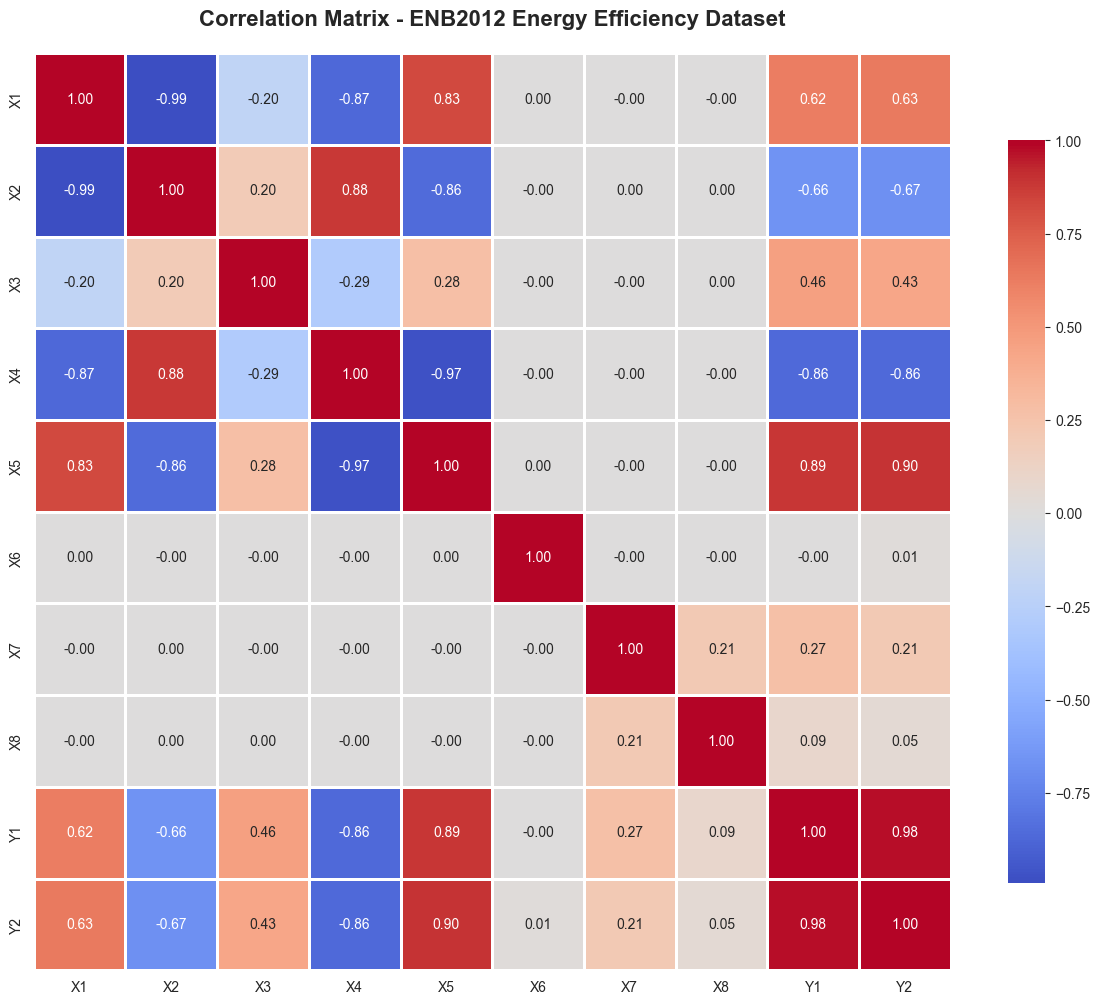


🔥 Highly Correlated Feature Pairs (|correlation| > 0.7):


,Feature 1,Feature 2,Correlation
0,X1,X2,-0.992
1,X1,X4,-0.869
2,X1,X5,0.828
3,X2,X4,0.881
4,X2,X5,-0.858
5,X4,X5,-0.973
6,X4,Y1,-0.862
7,X4,Y2,-0.863
8,X5,Y1,0.889
9,X5,Y2,0.896


In [8]:
# Correlation matrix for Dataset 1
if 'df1' in locals():
    print("CORRELATION ANALYSIS - Dataset 1")
    print("=" * 70)
    
    # Select only numeric columns
    numeric_cols = df1.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        # Calculate correlation
        corr_matrix = df1[numeric_cols].corr()
        
        # Plot correlation heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Matrix - ENB2012 Energy Efficiency Dataset', 
                  fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        # Find highly correlated features (> 0.7 or < -0.7)
        print("\n🔥 Highly Correlated Feature Pairs (|correlation| > 0.7):")
        high_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) > 0.7:
                    high_corr.append({
                        'Feature 1': corr_matrix.columns[i],
                        'Feature 2': corr_matrix.columns[j],
                        'Correlation': round(corr_matrix.iloc[i, j], 3)
                    })
        
        if high_corr:
            display(pd.DataFrame(high_corr))
        else:
            print("   No highly correlated pairs found.")
    else:
        print("No numeric columns found for correlation analysis.")

## 7. Correlation Analysis - Dataset 2

CORRELATION ANALYSIS - Dataset 2


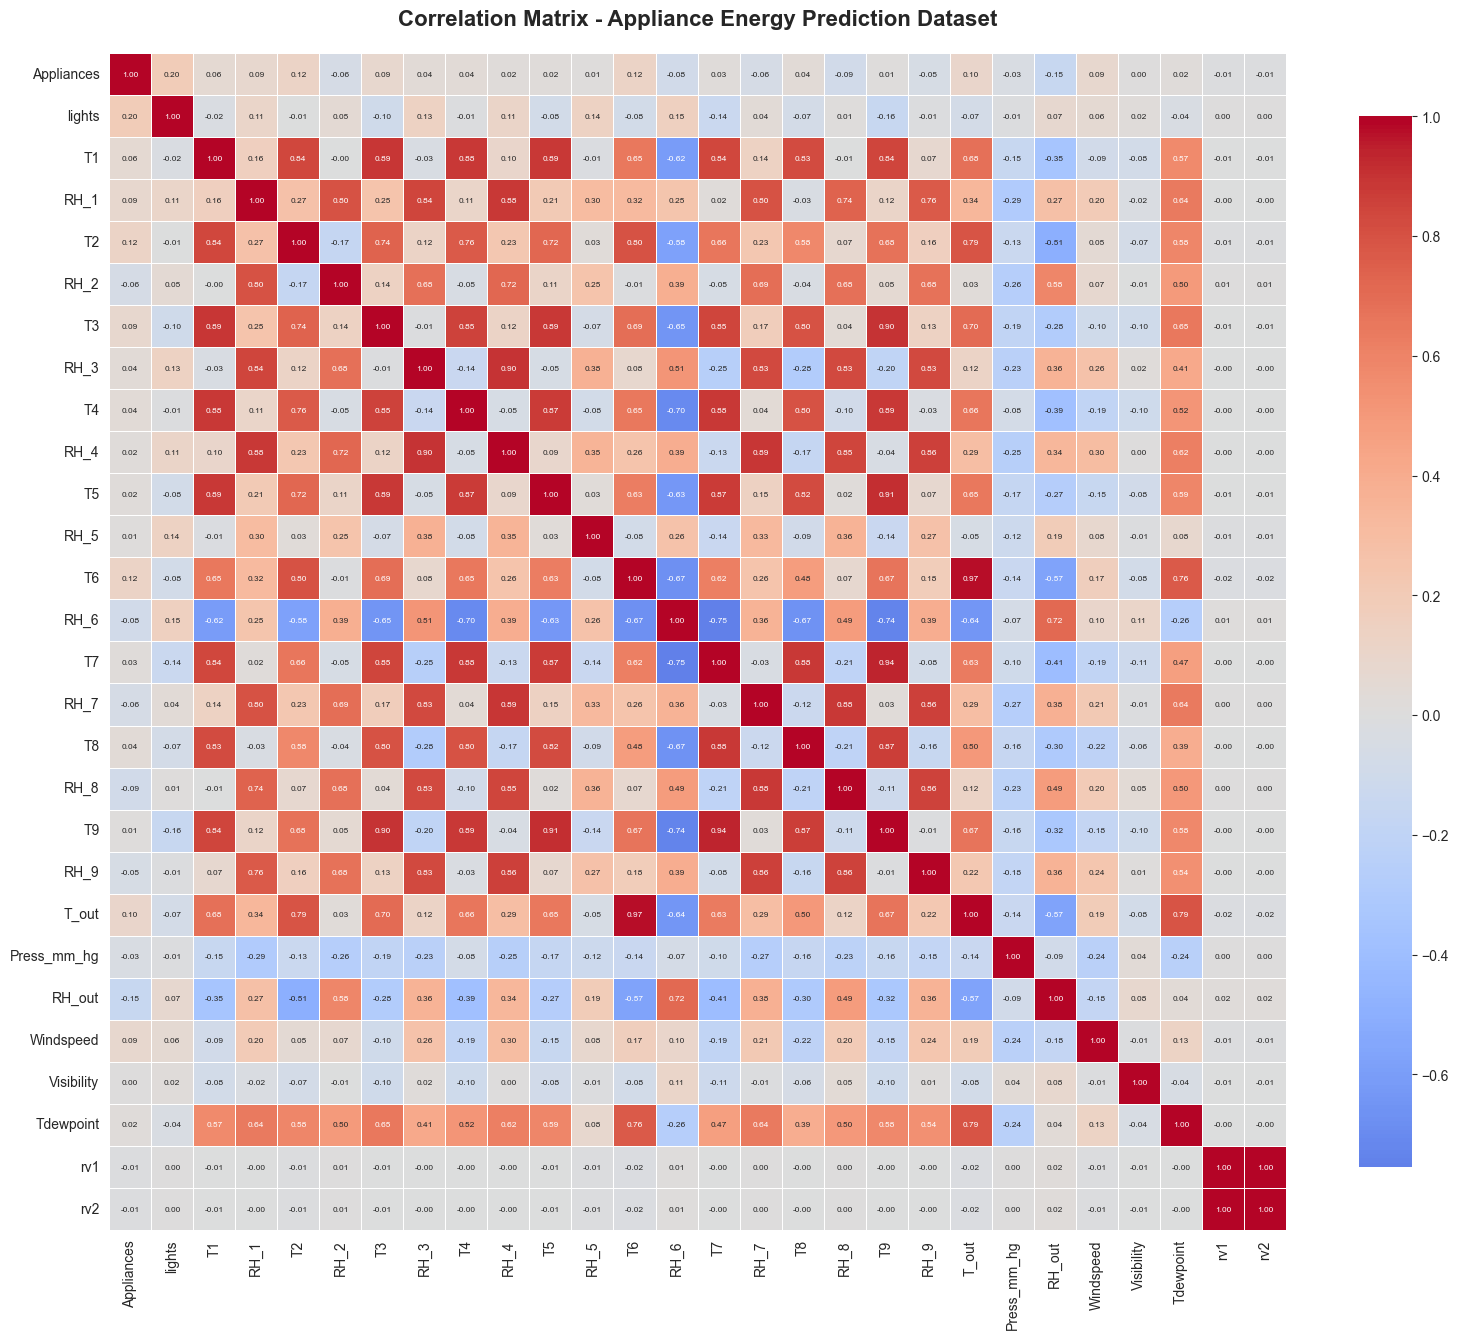


📊 Correlation with potential target variables:

Top correlations with 'Appliances':


lights       0.197278
RH_out       0.152282
T2           0.120073
T6           0.117638
T_out        0.099155
RH_8         0.094039
Windspeed    0.087122
RH_1         0.086031
T3           0.085060
RH_6         0.083178
Name: Appliances, dtype: float64

In [9]:
# Correlation matrix for Dataset 2
if 'df2' in locals():
    print("CORRELATION ANALYSIS - Dataset 2")
    print("=" * 70)
    
    # Select only numeric columns
    numeric_cols = df2.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        # For large datasets, show top correlations with target variable if it exists
        # Assuming 'Appliances' or similar is the target
        
        # Calculate correlation
        corr_matrix = df2[numeric_cols].corr()
        
        # Plot correlation heatmap (might be large, so use smaller figure for many features)
        if len(numeric_cols) > 15:
            fig_size = (16, 14)
            annot_size = 6
        else:
            fig_size = (12, 10)
            annot_size = 8
            
        plt.figure(figsize=fig_size)
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                    annot_kws={'size': annot_size})
        plt.title('Correlation Matrix - Appliance Energy Prediction Dataset', 
                  fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        # Show top correlations if there's a clear target variable
        print("\n📊 Correlation with potential target variables:")
        for col in numeric_cols[:5]:  # Check first 5 columns
            if 'energy' in col.lower() or 'appliance' in col.lower() or 'load' in col.lower():
                print(f"\nTop correlations with '{col}':")
                corr_with_target = corr_matrix[col].abs().sort_values(ascending=False)[1:11]
                display(corr_with_target)
    else:
        print("No numeric columns found for correlation analysis.")

## 8. Initial Insights and ML Algorithm Suitability

Based on the exploratory analysis, let's determine which algorithms are suitable for each dataset.

In [10]:
print("=" * 90)
print("INITIAL INSIGHTS & ML ALGORITHM RECOMMENDATIONS")
print("=" * 90)

insights = []

if 'df1' in locals():
    print("\n📊 DATASET 1: ENB2012_data.xlsx")
    print("-" * 90)
    print("✅ Suitable for:")
    print("   • LINEAR REGRESSION - Predict heating/cooling loads from building features")
    print("   • POLYNOMIAL REGRESSION - Capture non-linear relationships")
    print("   • DECISION TREES - Handle feature interactions")
    print("   • RANDOM FOREST - Improve prediction accuracy")
    print("   • NEURAL NETWORKS (PyTorch) - Deep learning approach")
    print("   • CLUSTERING (K-means) - Group similar buildings")
    print("\n💡 Insights:")
    print(f"   • {df1.shape[0]} building samples")
    print(f"   • {df1.shape[1]} features")
    print(f"   • Clean data - no missing values")
    print("   • All numeric features - ready for ML")
    print("   • Multiple targets possible (heating and cooling loads)")

if 'df2' in locals():
    print("\n\n📊 DATASET 2: energydata_complete.csv")
    print("-" * 90)
    print("✅ Suitable for:")
    print("   • LINEAR REGRESSION - Predict appliance energy consumption")
    print("   • LOGISTIC REGRESSION - Binary classification (high/low energy)")
    print("   • DECISION TREES - Capture temporal patterns")
    print("   • NEURAL NETWORKS (PyTorch) - Time-series modeling")
    print("   • CLUSTERING (K-means) - Identify energy consumption patterns")
    print("\n💡 Insights:")
    print(f"   • {df2.shape[0]} time-series observations")
    print(f"   • {df2.shape[1]} features (temperature, humidity, weather data)")
    if df2.isnull().sum().sum() == 0:
        print("   • Clean data - no missing values")
    print("   • Rich feature set for complex modeling")
    print("   • Can create classification problems from regression")

print("\n\n🎯 PROJECT STRATEGY:")
print("-" * 90)
print("To maximize marks, we can:")
print("1. Use BOTH datasets to showcase different problem types")
print("2. Dataset 1: Focus on regression algorithms and model comparison")
print("3. Dataset 2: Create both regression AND classification problems")
print("4. Apply clustering to both datasets for unsupervised learning")
print("5. Use PyTorch neural networks on at least one dataset")
print("6. Compare all algorithms using appropriate metrics (MSE, R², Accuracy, etc.)")
print("\n✅ This covers ALL algorithms learned in your course!")
print("=" * 90)

INITIAL INSIGHTS & ML ALGORITHM RECOMMENDATIONS

📊 DATASET 1: ENB2012_data.xlsx
------------------------------------------------------------------------------------------
✅ Suitable for:
   • LINEAR REGRESSION - Predict heating/cooling loads from building features
   • POLYNOMIAL REGRESSION - Capture non-linear relationships
   • DECISION TREES - Handle feature interactions
   • RANDOM FOREST - Improve prediction accuracy
   • NEURAL NETWORKS (PyTorch) - Deep learning approach
   • CLUSTERING (K-means) - Group similar buildings

💡 Insights:
   • 768 building samples
   • 10 features
   • Clean data - no missing values
   • All numeric features - ready for ML
   • Multiple targets possible (heating and cooling loads)


📊 DATASET 2: energydata_complete.csv
------------------------------------------------------------------------------------------
✅ Suitable for:
   • LINEAR REGRESSION - Predict appliance energy consumption
   • LOGISTIC REGRESSION - Binary classification (high/low energy)

## 9. Save Summary for Project Documentation

In [11]:
# Create summary for documentation
summary = {
    'analysis_date': '2025-12-07',
    'datasets_analyzed': []
}

if 'df1' in locals():
    summary['datasets_analyzed'].append({
        'name': 'ENB2012_data.xlsx',
        'rows': df1.shape[0],
        'columns': df1.shape[1],
        'missing_values': df1.isnull().sum().sum(),
        'suitable_algorithms': ['Linear Regression', 'Decision Trees', 'Neural Networks', 'K-means']
    })

if 'df2' in locals():
    summary['datasets_analyzed'].append({
        'name': 'energydata_complete.csv',
        'rows': df2.shape[0],
        'columns': df2.shape[1],
        'missing_values': df2.isnull().sum().sum(),
        'suitable_algorithms': ['Linear Regression', 'Logistic Regression', 'Decision Trees', 'Neural Networks', 'K-means']
    })

print("✅ Analysis complete!")
print(f"   • {len(summary['datasets_analyzed'])} datasets analyzed")
print(f"   • Ready to proceed with ML model development")
print("\n📝 Next steps:")
print("   1. Create detailed preprocessing notebooks")
print("   2. Implement regression models")
print("   3. Implement classification models")
print("   4. Implement clustering analysis")
print("   5. Implement neural networks with PyTorch")
print("   6. Compare and evaluate all models")

✅ Analysis complete!
   • 2 datasets analyzed
   • Ready to proceed with ML model development

📝 Next steps:
   1. Create detailed preprocessing notebooks
   2. Implement regression models
   3. Implement classification models
   4. Implement clustering analysis
   5. Implement neural networks with PyTorch
   6. Compare and evaluate all models
